# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




## 1. Importación de paquetes y dataset

Importación de paquetes

In [1]:
# Realizamos las importaciones necesarias para que los algoritmos funcionen correctamente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Usamos esto para que ignore los warnings.
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

Importación del dataset

In [2]:
# Leemos el csv de entrenamiento.
df = pd.read_csv('credit-train.csv', index_col=False)

# Leemos el csv de test para realizar las predicciones.
df_test = pd.read_csv('credit-test.csv', index_col=False)

## 2.EDA y Visual EDA

In [3]:
# Visualizamos los datos de las 5 primeras filas.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# Vemos la información del dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
# Visualizamos los parámetros estadísticos de cada columna del dataframe:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
10%,28.00000,59.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.046000,5076.200000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
90%,55.00000,551.000000,5.000000,999.000000,1.000000,1.400000,94.465000,-36.100000,4.964000,5228.100000,1.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
# Columnas del dataframe.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

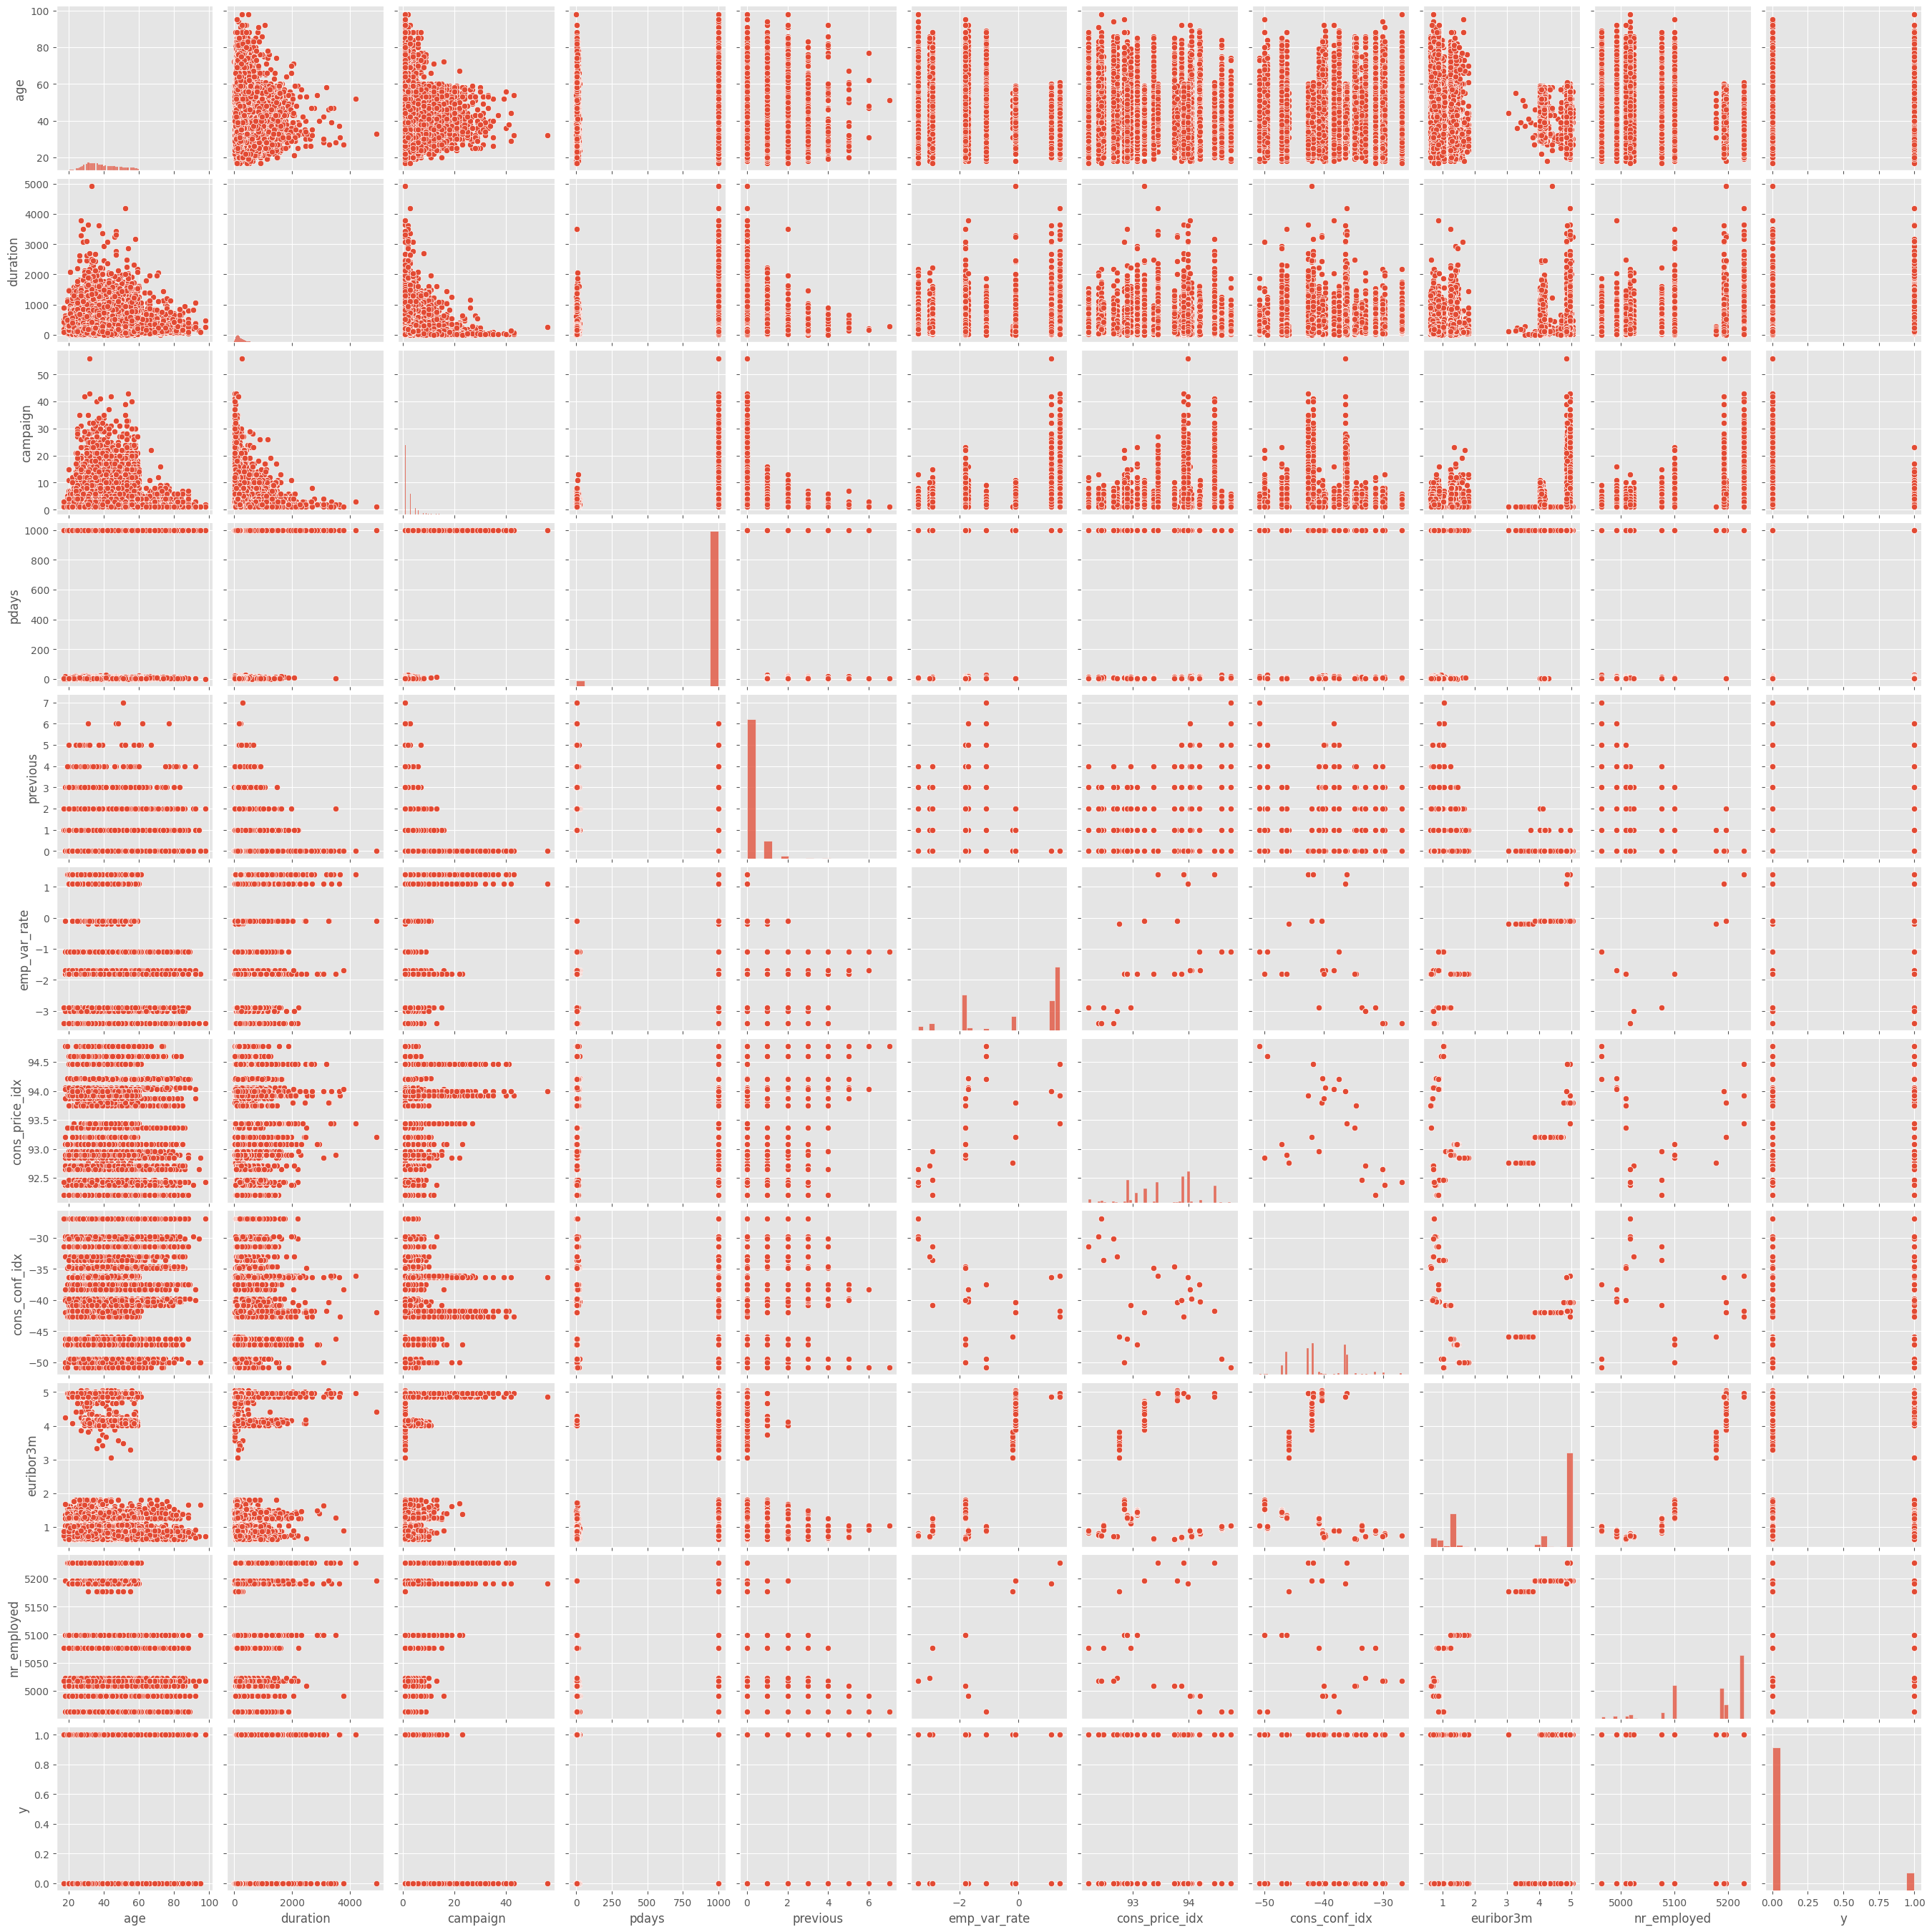

In [7]:
# Vemos la relaciones que existen entre las diferentes columnas numericas.
sb.pairplot(df)

<Axes: ylabel='Frequency'>

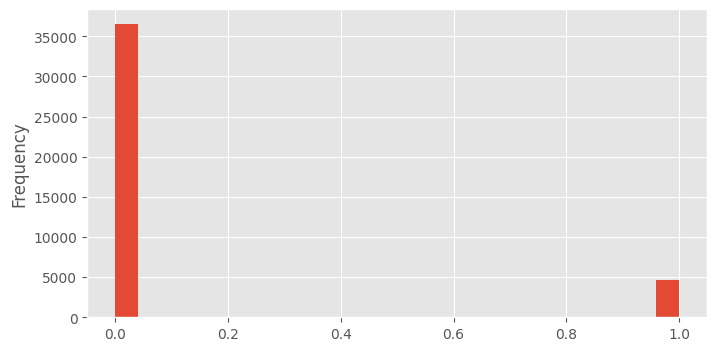

In [8]:
# Analizamos la frecuencia con la que es 0 o 1 , pudiendo observar la gran diferencia siendo 0 lo más habitual.
df['y'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

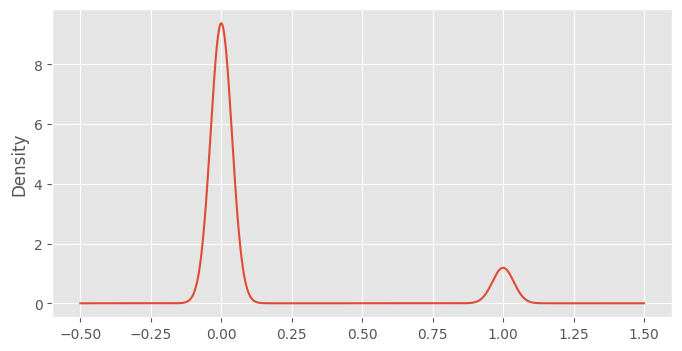

In [9]:
# Analizamos la densidad de 0 y 1, observando gran diferencia, predominando el 0 sobre el 1.
df['y'].plot.density(figsize=(8,4))

In [10]:
# Visualizamos la correlación que existe entre las columnas numéricas.
df.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<Axes: >

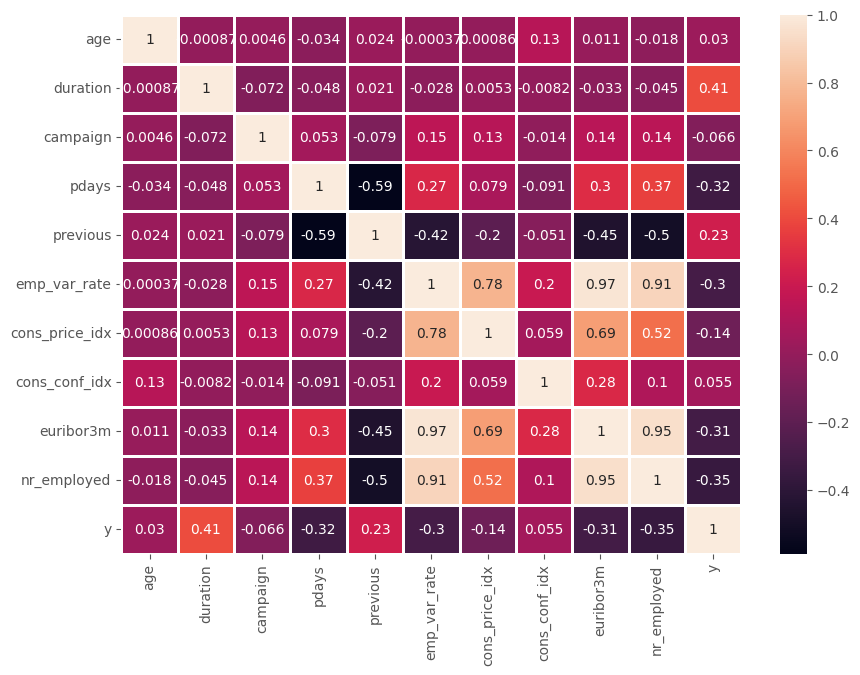

In [11]:
# Visualizamos la correlación entre las columnas númericas.
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(numeric_only=True),annot=True,linewidths=2)

## 3. Preprocessing data


In [12]:
# Buscamos los valores nulos, pudiendo observar que no hay, con lo cual no hace falta tratarlos.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [13]:
# Analizamos las columnas y borramos las siguientes por las siguientes razones:

# Month/Day_of_week : Ya que contamos con los dias del último contacto pudiendo así sacar esta información.
# Nr_employed : No influye el núymero de empleados en la toma de la decisión.

# Creamos una lista de las columnas que vamos a borrar y las borramos.
to_drop = ['month', 'day_of_week', 'nr_employed']
df = df.drop(to_drop, axis=1)
df_test = df_test.drop(to_drop, axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,0
1,53,technician,married,unknown,no,no,no,cellular,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,0
2,28,management,single,university.degree,no,yes,no,cellular,339,3,6,2,success,-1.7,94.055,-39.8,0.729,1
3,39,services,married,high.school,no,no,no,cellular,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,0
4,55,retired,married,basic.4y,no,yes,no,cellular,137,1,3,1,success,-2.9,92.201,-31.4,0.869,1


In [14]:
# Convertimos las columnas categoricas en numericas.

columnas_categoricas = df.select_dtypes(include=['object']).columns #Seleccionamos las columnas categoricas para que no nos modifique también las numéricas.

# Los valores númericos van en orden segun el orden alfabético.
for col in columnas_categoricas:
    df[col] = LabelEncoder().fit_transform(df[col])
    df_test[col] = LabelEncoder().fit_transform(df_test[col])

# Mostramos el df.
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,1,1,0,1,2,0,0,210,1,999,0,1,1.4,93.444,-36.1,4.963,0
1,53,9,1,7,0,0,0,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021,0
2,28,4,2,6,0,2,0,0,339,3,6,2,2,-1.7,94.055,-39.8,0.729,1
3,39,7,1,3,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,0
4,55,5,1,0,0,2,0,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,1


In [15]:
# Mostramos el df de test, el que se usará para las predicciones.
df_test.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m
0,30,1,1,2,0,2,0,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313
1,39,7,2,3,0,0,0,1,346,4,999,0,1,1.1,93.994,-36.4,4.855
2,25,7,1,3,0,2,0,1,227,1,999,0,1,1.4,94.465,-41.8,4.962
3,38,7,1,2,0,1,1,1,17,3,999,0,1,1.4,94.465,-41.8,4.959
4,47,0,1,6,0,2,0,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191


# KNN

## 4. Cálculo de la mejor K  y división del dataset

In [16]:
# Dividimos el dataframe en X e y, siendo X todas las columnas necesarias para predecir y.
X = df.iloc[:, :-1].values
y = df.iloc[:, [-1]].values

# Dividimos el dataframe en 80% para realizar el train y el 20% restante para realizar el test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

([<matplotlib.axis.XTick at 0x7eeb99587d90>,
 [Text(0, 0, '0'), Text(5, 0, '5'), Text(10, 0, '10'), Text(15, 0, '15')])

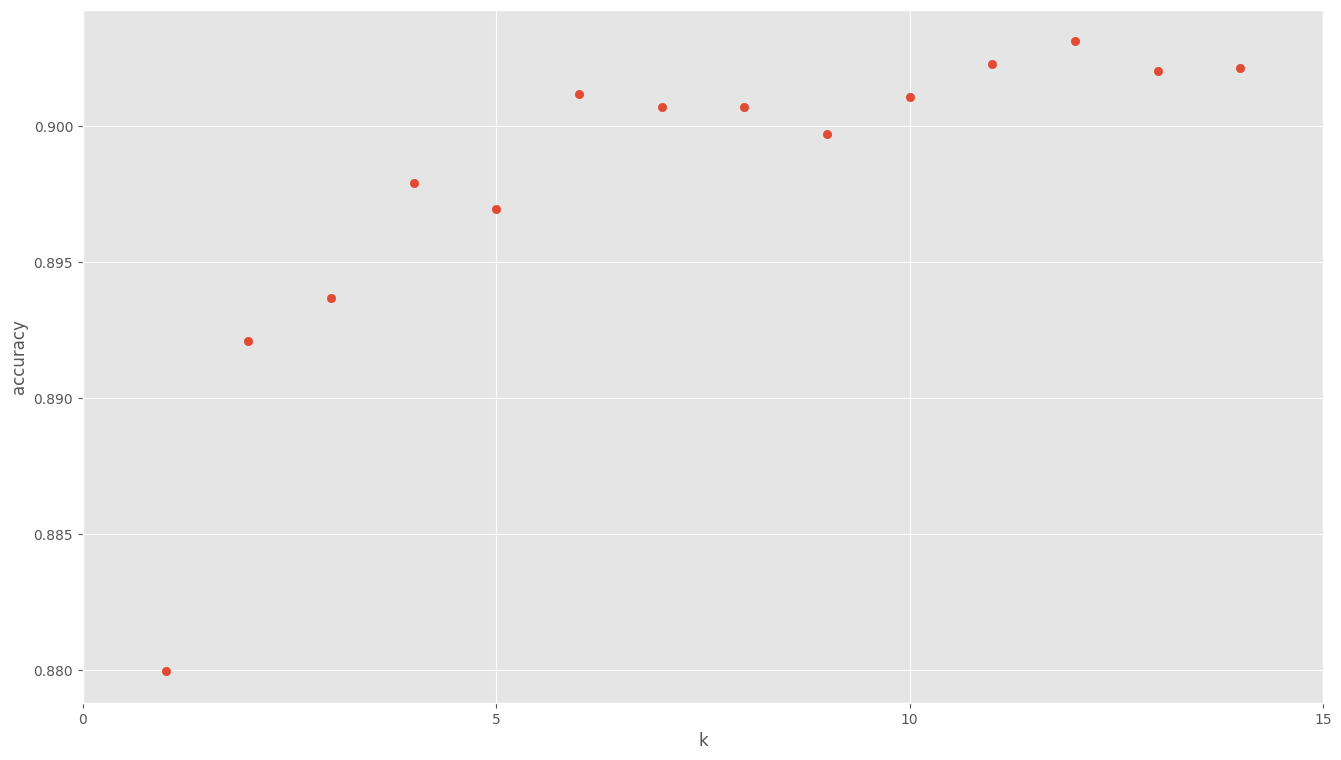

In [17]:
# Obtenemos el valor de K.
k_range = range(1,15)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15])

# Al generar la gráfica entre un rango de 1 a 15 podemos observar que el punto más elevado se encuentra en la x = 12,
# siendo 12 nuestra K.
# K = 12.

## 5. Creación del modelo

In [18]:
# Creamos el modelo pasando la K = 12 obtenida anteriormente.

n_neighbors = 12

knn = KNeighborsClassifier(n_neighbors)

## 6.Entrenamiento

In [19]:
# Realizamos el entreno con x e y de train.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

## 7. Análisis de resultados

In [20]:
# Analizamos los resultados realizando predicciones, imprimiendo la matriz confusión
# y un reporte para analizar el rendimiento.

pred = knn.predict(X_test)

# Al mostrar la matriz confusión podemos observar varias cosas, el modelo predijo correctamente 7109 casos en la que la predicción era 0
# y 186 en la que era 1. Pero, también podemos observar, que falló 612 predicciones en la que era 0 y  331 en la que era 1.
print(confusion_matrix(y_test, pred))

# Al hacer el reporte de clasificación podemos ver, que la precisión de predecir 0 es de 0,92, pero la de predecir 1 es de 0,64. Tras ver también la matriz
# confusión, podemos observar que la predicción de 0 es bastante buena pero a la hora de predecir 1 no lo es tanto. Esto se puede deber a que
# a la hora de entrenar hay muchos más casos de 0 que de 1.
print(classification_report(y_test, pred))


[[7109  186]
 [ 612  331]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7295
           1       0.64      0.35      0.45       943

    accuracy                           0.90      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



In [21]:
# Realizamos los score tanto del train como del test

print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

# Tras ver la salida del score podemos ver que tanto el train como el test tienen un alto rendimiento,
# lo que indica que el modelo funciona bastante bien

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.90


## 8. Realización de predicciones

In [22]:
# Creamos una lista para almacenar las predicciones que vamos a realizar
predicciones = []

for i, fila in df_test.iterrows():

	# Volcamos las columnas que vamos a necesitar para realizar las predicciones
	columnas_necesarias = fila[df_test.columns[:17]].values.reshape(1, -1)

	# Realizamos las predicciones
	prediccion = knn.predict(columnas_necesarias)
	predicciones.append(prediccion[0])


df_test['Prediccion'] = predicciones
df_test

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,Prediccion
0,30,1,1,2,0,2,0,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,0
1,39,7,2,3,0,0,0,1,346,4,999,0,1,1.1,93.994,-36.4,4.855,0
2,25,7,1,3,0,2,0,1,227,1,999,0,1,1.4,94.465,-41.8,4.962,0
3,38,7,1,2,0,1,1,1,17,3,999,0,1,1.4,94.465,-41.8,4.959,0
4,47,0,1,6,0,2,0,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,53,1,999,0,1,1.4,93.918,-42.7,4.958,0
4115,39,0,1,3,0,2,0,1,219,1,999,0,1,1.4,93.918,-42.7,4.959,0
4116,27,8,2,3,0,0,0,0,64,2,999,1,0,-1.8,92.893,-46.2,1.354,0
4117,58,0,1,3,0,0,0,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,0


## 9. Visualización

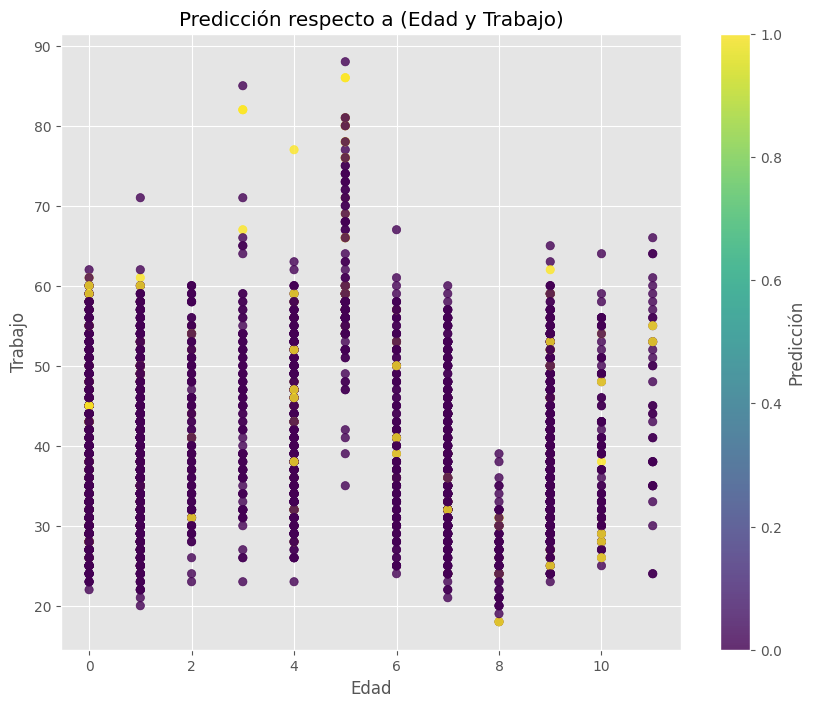

In [23]:
# Creamos la figura y el gráfico
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_test['job'], df_test['age'], c=df_test['Prediccion'], cmap='viridis', alpha=0.8)

# MOstramos la gráfica
plt.title('Predicción respecto a (Edad y Trabajo)')
plt.xlabel('Edad')
plt.ylabel('Trabajo')
plt.colorbar(scatter, label='Predicción')

plt.grid(True)
plt.show()

# A la hora de realizar la gráfica seleccione los valores Edad y Trabajo ya que creo que están bastante relacionados a la hora de aceptar
# o denegar un crédito. Al generar la gráfica principalmente podemos ver que se aceptan pocas veces, destacando que el rango de eddad donde más
# llaman es entre los 30 y 60, aunque si estas retirado llaman más entre los 50 y 80 años ya que suele ser el rango de edades.
# A la hora de aceptar créditos el rango de edad donde más se acepta es entre los 50 y 70 años, y los trabajos donde más se suelen aceptar son desempleado, ya que
# tienen un mínimo de ingresos, emprendedor suelen aceptar para iniciar un proyecto y técnicos ya que suele ser uno de los trabajo menos remunerado.Destacar que a los
# que menos interacción tienen son con los estudiantes.

# Linear Regression

## 4. Creación del modelo y división del dataset

In [24]:
# Dividimos el dataframe en X e y, siendo X todas las columnas necesarias para predecir y.
X = df.iloc[:, :-1].values
y = df.iloc[:, [-1]].values

# Dividimos el dataframe en 80% para realizar el train y el 20% restante para realizar el test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Estandarizamos los datos para evitar datos atípicos, ajustando
# las características para que se encuentren los valores entre 0 y 1
# siguiendo la proporción

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [26]:
# Creamos el modelo

lm = LinearRegression()

## 5. Entrenamiento

In [27]:
# Realizamos el entreno con x e y de train
lm.fit(X_train,y_train)

LinearRegression()

## 6. Realización de predicciones

In [28]:
# Analizamos el tipo y tamaño de la predicción
predictions = lm.predict(X_test)
print ("Tipo del objeto:", type(predictions))
print ("Tamaño del objeto:", predictions.shape)

Tipo del objeto: <class 'numpy.ndarray'>
Tamaño del objeto: (8238, 1)


In [29]:
# Creamos una lista para almacenar las predicciones que vamos a realizar
predicciones = []

for i, fila in df_test.iterrows():

	# Volcamos las columnas que vamos a necesitar para realizar las predicciones
	columnas_necesarias = fila[df_test.columns[:17]].values.reshape(1, -1)

	# Realizamo las predicciones
	prediccion = lm.predict(columnas_necesarias)
	predicciones.append(prediccion[0])


df_test['Prediccion'] = predicciones
df_test

# Como se puede ver a la hora de mostrar los valores de la columna Predicción, da valores diferentes a 0 o 1,
# esto se debe a que Linear Regresión no es el algoritmo para hacer este tipo de predicción, ya que es binario,
# con lo cual deberia ser un algoritmo de clasificación y no de regresión.

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,Prediccion
0,30,1,1,2,0,2,0,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,[83.17330409854311]
1,39,7,2,3,0,0,0,1,346,4,999,0,1,1.1,93.994,-36.4,4.855,[29.21855601270627]
2,25,7,1,3,0,2,0,1,227,1,999,0,1,1.4,94.465,-41.8,4.962,[-17.666163264268867]
3,38,7,1,2,0,1,1,1,17,3,999,0,1,1.4,94.465,-41.8,4.959,[-98.4861246078434]
4,47,0,1,6,0,2,0,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,[-82.04826891558774]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,53,1,999,0,1,1.4,93.918,-42.7,4.958,[-84.95231441490814]
4115,39,0,1,3,0,2,0,1,219,1,999,0,1,1.4,93.918,-42.7,4.959,[-20.885205528427555]
4116,27,8,2,3,0,0,0,0,64,2,999,1,0,-1.8,92.893,-46.2,1.354,[-80.00738399763384]
4117,58,0,1,3,0,0,0,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,[99.48650926569692]


## 7. Análisis de resultados

In [30]:
# Analizamos el rendimiento del modelo
mseLinear = mean_squared_error(y_test,predictions)


print('Error Cuadrático Medio (MSE) = %.5f' % mseLinear)
print("Error Absoluto Medio (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Error Cuadrático Medio (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Raíz Cuadrada del MSE (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R^2 de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

# Tras analizar los errores podemos obserbar varias cosas, el MAE y RMSE son bajos lo que indica que tienen un error aceptable,
# pero R^2 es bastante bajo lo que indica que hay poca variedad en los datos.

Error Cuadrático Medio (MSE) = 0.68524
Error Absoluto Medio (MAE): 0.4961647913228288
Error Cuadrático Medio (MSE): 0.6852377282734302
Raíz Cuadrada del MSE (RMSE): 0.8277908723061823
R^2 de las predicciones: 0.327


In [31]:
# Realizamos los score tanto del train como del test

print('Accuracy of Linear Regression on training set: {:.2f}'
      .format(lm.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
      .format(lm.score(X_test, y_test)))

# Tras ver la salida del score podemos ver que tanto el train como el test tienen un bajo rendimiento,
# esto se debe a lo que comente antes, al tratarse de un resultado binario, un algoritmo de regresión
# no está funcionando bien

Accuracy of Linear Regression on training set: 0.34
Accuracy of Linear Regression on test set: 0.33


In [32]:
# Es el valor que se espera de la variable de respuesta cuando todas las características son cero.
print("The intercept term of the linear model:", lm.intercept_)

# Tras ver la salida podemos ver que es un valor cercano a 0 lo que significa que el
# modelo tiene una intercepción mínima

The intercept term of the linear model: [2.37062041e-12]


In [33]:
# Son valores que indican como cada característica ayuda a predecir la variable
print("The coefficients of the linear model:", lm.coef_)

# Tras analizar la salida podemos ver la importancia de cada columna en la salida de la predicción,
# siendo 0.38567939 (duration) la más relevante y -0.4672061 (emp_var_rate) la menos.

The coefficients of the linear model: [[ 0.01443471  0.0061573   0.01188483  0.02845465 -0.02392258  0.00250849
  -0.00590978 -0.15431413  0.38567939  0.01097068 -0.12823524  0.00564119
   0.07919199 -0.4672061   0.30597556  0.13912692  0.00305328]]


## 8. Visualización

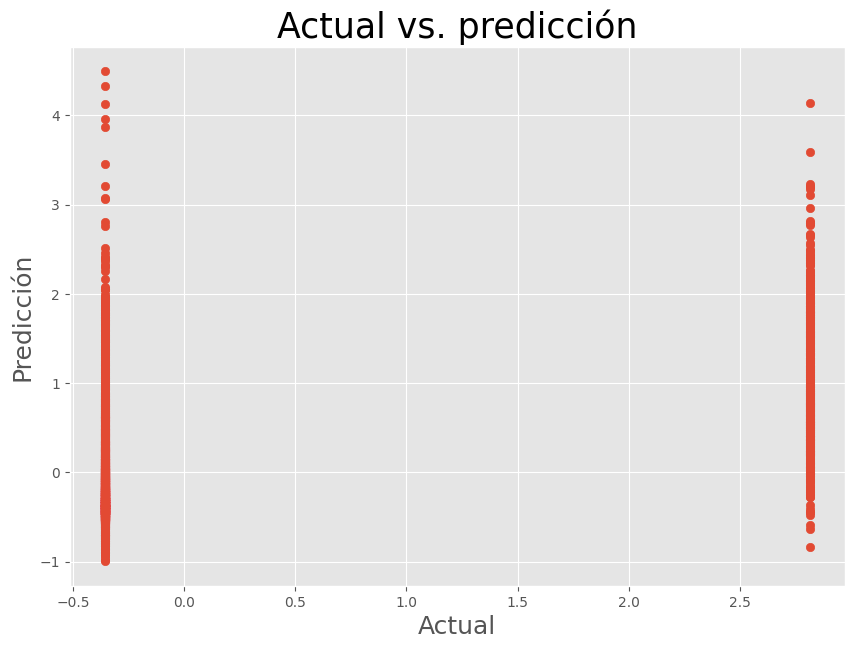

In [34]:
# Generamos la figura y pintamos la gráfica

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicción",fontsize=25)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicción", fontsize=18)
plt.scatter(x=y_test,y=predictions)

# Podemos observar que la gráfica no tiene sentidoo y esto se debe a lo comentado anteriormente, ya que es un algoritmo de regresión
# siendo una predicción binaria

# Random Forest

## 4.Creación del modelo y división del dataset

In [35]:
# Creamos el modelo

crf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=678, random_state=2)

# Dividimos el dataframe en X e y, siendo X todas las columnas necesarias para predecir y.
X = df.iloc[:, :-1].values
y = df.iloc[:, [-1]].values

# Dividimos el dataframe en 80% para realizar el train y el 20% restante para realizar el test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.Entrenamiento

In [36]:
# Realizamos el entreno con x e y de train
crf.fit(X_train, y_train)

RandomForestClassifier(max_samples=678, random_state=2)

## 6.Análisis de resultados


In [37]:
# Realizamos los score tanto del train como del test

print("Precisión en conjunto de datos de entrenamiento: {:.2f}".format(crf.score(X_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.2f}".format(crf.score(X_test, y_test)))

# Tras ver la salida del score podemos ver que tanto el train como el test tienen un alto rendimiento,
# lo que indica que el modelo funciona bien

Precisión en conjunto de datos de entrenamiento: 0.92
Precisión en el conjunto de datos de evaluación: 0.91


## 7.Realización de predicciones

In [38]:
# Analizamos los resultados realizando predicciones, imprimiendo la matriz confusión
# y un reporte para analizar el rendimiento

pred = crf.predict(X_test)

# Al mostrar la matriz confusión podemos observar varias cosas, el modelo predijo correctamente 7115 casos en la que la predicción era 0
# y 180 en la que era 1. Pero, también podemos observar, que falló 576 predicciones en la que era 0 y  367 en la que era 1.
print(confusion_matrix(y_test, pred))

# Al hacer el reporte de clasificación podemos ver, que la precisión de predecir 0 es de 0,93, pero la de predecir 1 es de 0,67. Tras ver también la matriz
# confusión, podemos observar que la predicción de 0 es bastante buena pero a la hora de predecir 1 no lo es tanto. Esto se puede deber a que
# a la hora de entrenar hay muchos más casos de 0 que de 1.
print(classification_report(y_test, pred))

[[7115  180]
 [ 576  367]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7295
           1       0.67      0.39      0.49       943

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [39]:
# Creamos una lista para almacenar las predicciones que vamos a realizar
predicciones = []

for i, fila in df_test.iterrows():

	# Volcamos las columnas que vamos a necesitar para realizar las predicciones
	columnas_necesarias = fila[df_test.columns[:17]].values.reshape(1, -1)

	# Realizamo las predicciones
	prediccion = crf.predict(columnas_necesarias)
	predicciones.append(prediccion[0])


df_test['Prediccion'] = predicciones
df_test

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,Prediccion
0,30,1,1,2,0,2,0,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,0
1,39,7,2,3,0,0,0,1,346,4,999,0,1,1.1,93.994,-36.4,4.855,0
2,25,7,1,3,0,2,0,1,227,1,999,0,1,1.4,94.465,-41.8,4.962,0
3,38,7,1,2,0,1,1,1,17,3,999,0,1,1.4,94.465,-41.8,4.959,0
4,47,0,1,6,0,2,0,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,53,1,999,0,1,1.4,93.918,-42.7,4.958,0
4115,39,0,1,3,0,2,0,1,219,1,999,0,1,1.4,93.918,-42.7,4.959,0
4116,27,8,2,3,0,0,0,0,64,2,999,1,0,-1.8,92.893,-46.2,1.354,0
4117,58,0,1,3,0,0,0,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,0


## 8.Visualización del informe de clasificación

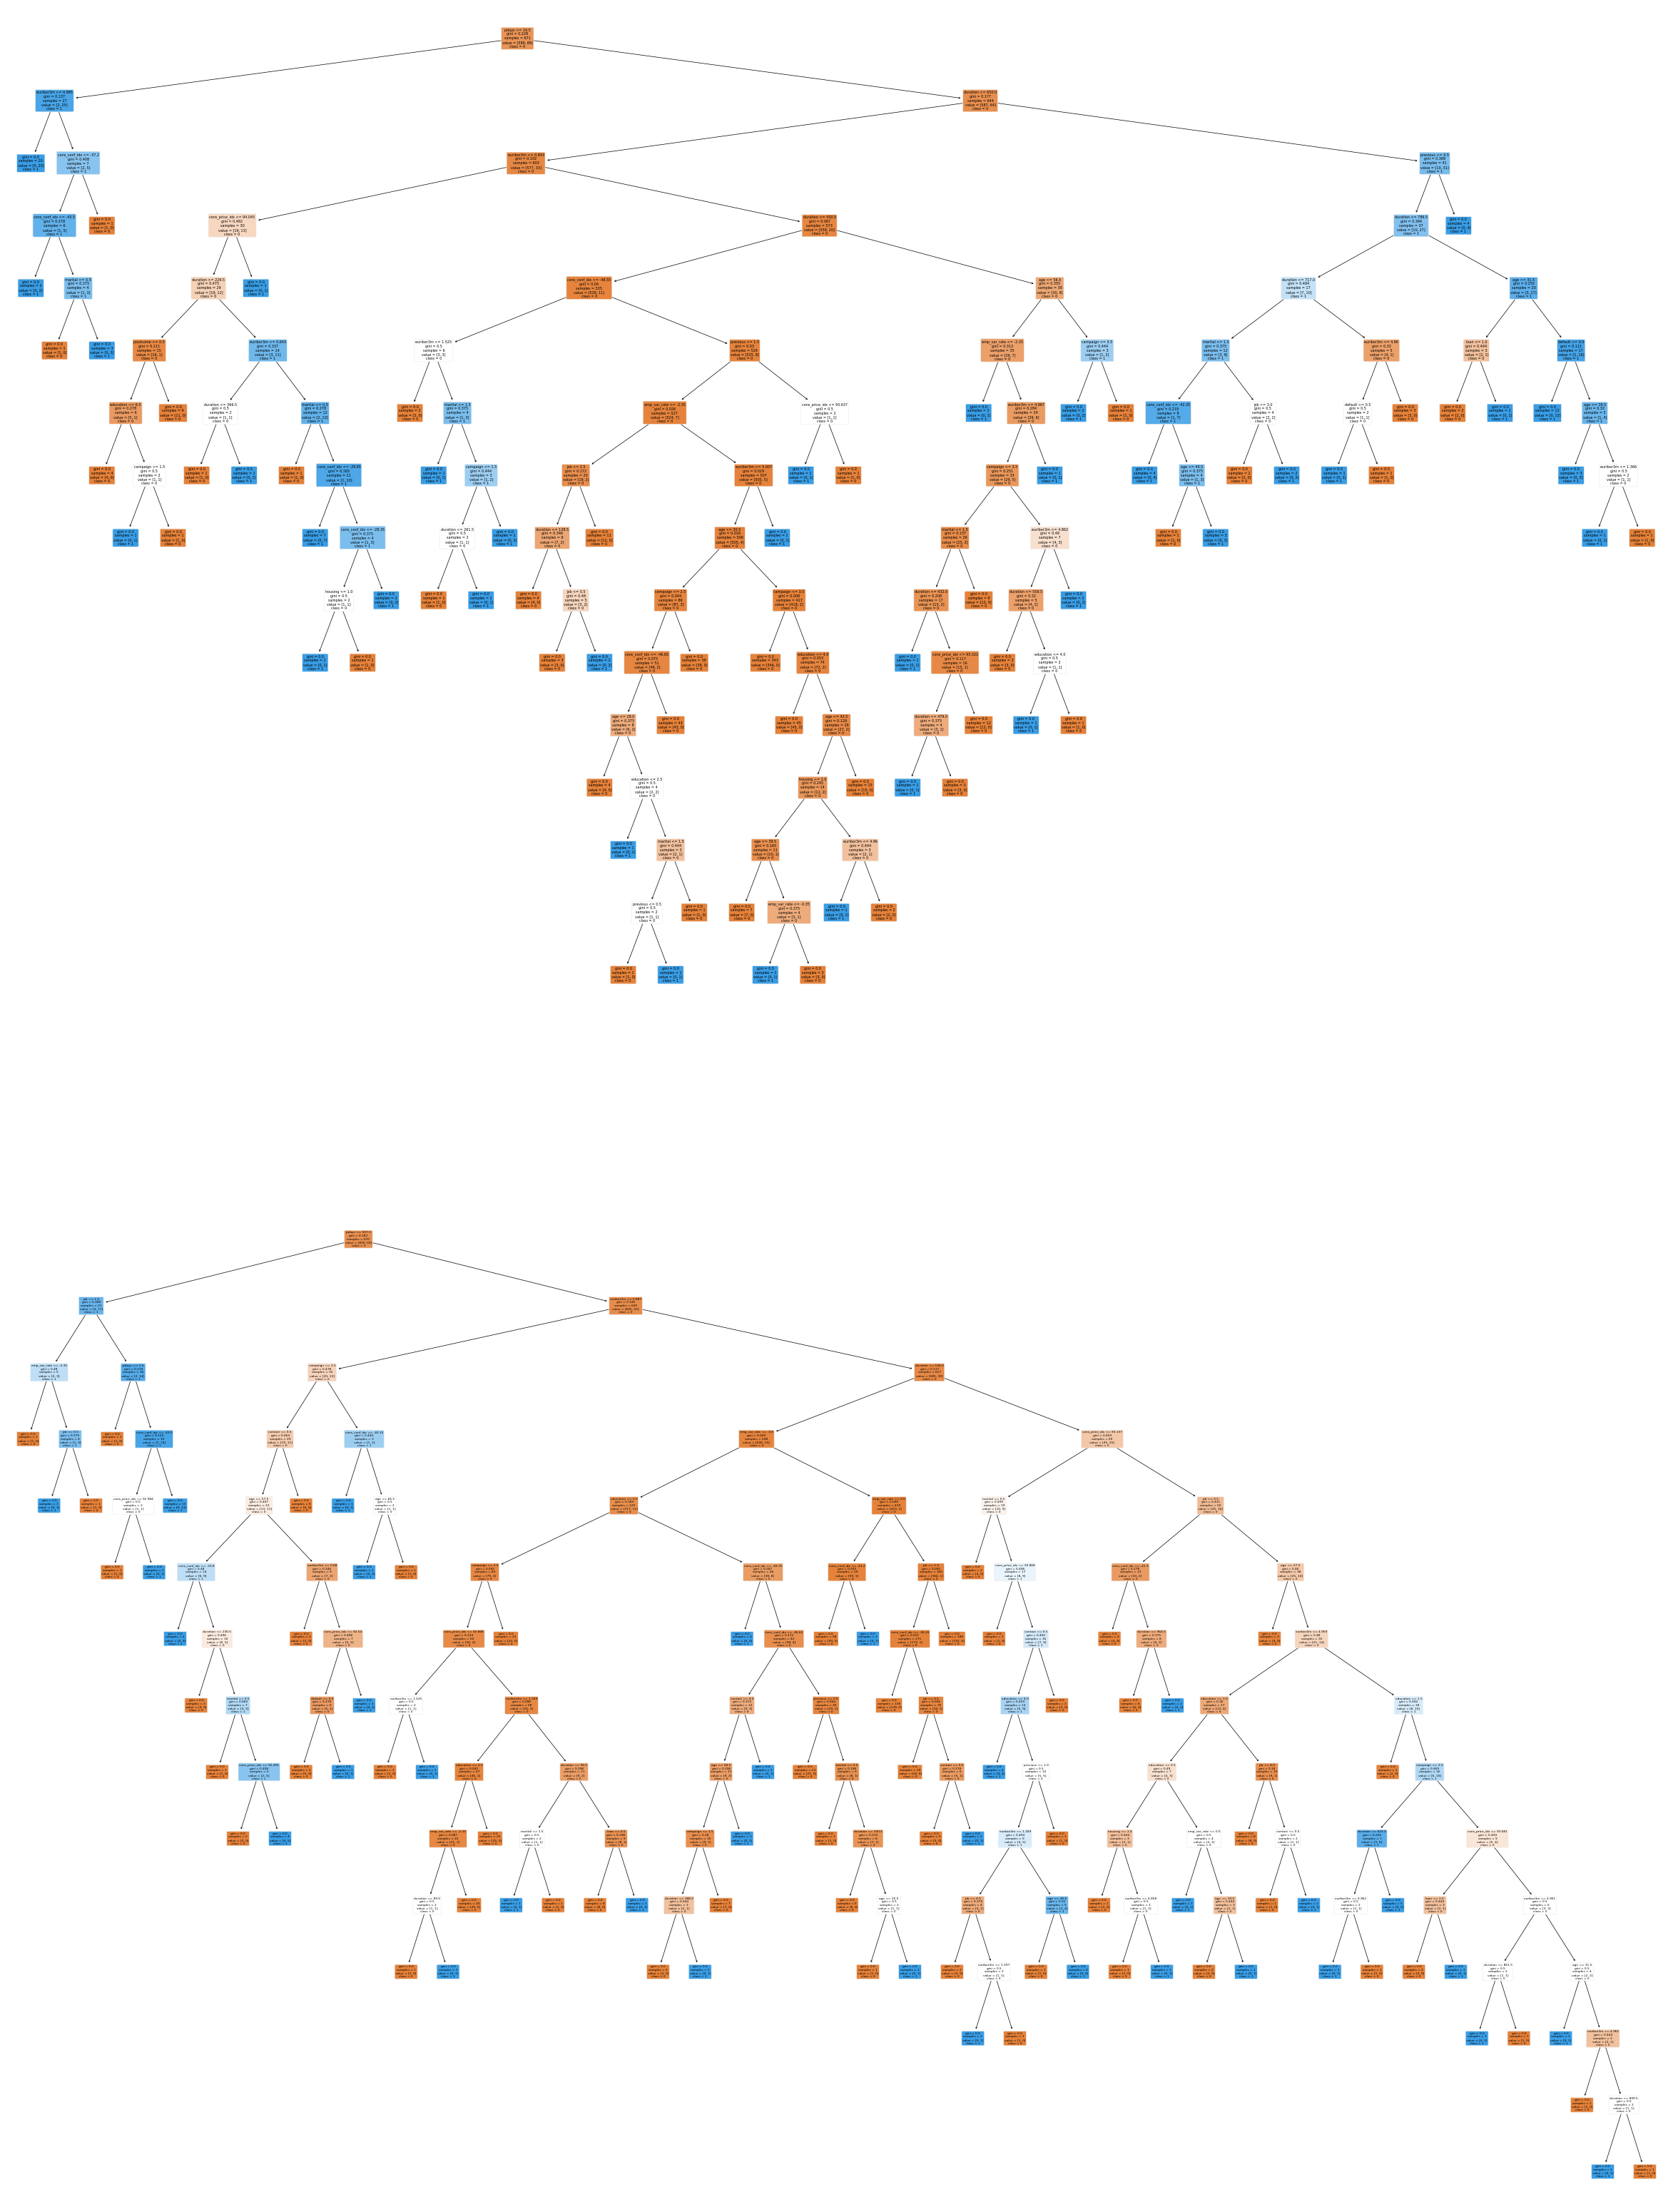

In [40]:
fig, axes = plt.subplots(2,1, figsize=(30,40))

for i in range(len(axes)):
  plot_tree(crf.estimators_[i],
            feature_names=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m'],
            class_names=['0','1'],
            filled=True,
            impurity=True,
            rounded=True,
            ax=axes[i])
plt.show()

# Al generar los árboles podemos ver que la columna por la que parten es la pdays lo que implica que es una de las importantes en la toma de la decisión,
# también podemos observar que tienen una profundidad de 15 y 16, considerandose un arbol complejo, pero la consecuenia de tener una gran
# profundida es el overfiting ya que se ajusta demasido a los datos de entrenamiento y no trata bien los datos nuevos.

# Conclusión

En este proyecto he tratado el conjunto de datos con los algoritmos KNN, Linear Regresion y Random Forest, y he llegado a esta conclusión:

Al tratarse de una predicción binaria he podido observar que el algoritmo Linear Regresion no se ajusta, debido a que este problema hay que tratarlo con un algoritmo de clasificación. Este es un ejemplo de algorimto de regresión por lo que produce una respuesta continua, todo lo contrario a la necesaria en este caso. Se puede observar también como anteriormente comenté, el mal valor del score, las malas predicciones y la gráfica que nos sale despúes de la ejecución. Después de esto, lo que nos deja claro es que no es el algoritmo óptimo para la resolución de este tipo de problemas.

Tras descartar por razones obvias el algoritmo anterior, voy a comparar tanto el Random Forest como el KNN. A la hora de revisar los scores podemos observar que nos dan los mismos valores, sin embargo, a la hora de revisar las predicciones podemos observar que el KNN al obtener 0 tiene una precisión de 0,92 teniendo el Random Forest 0,93 y en la predicción del 1 el KNN tiene 0,64 mientras que el Random Forest 0,97. Ahí podemos observar que el Random Forest es más preciso a la hora de realizar las predicciones frente al KNN.

Además, el Random Forest es menos sensible a valores atípicos que el KNN, lo que proporciona mejor rendimiento.

Tras lo comentado anteriormente, pienso que la forma más óptima y efectiva para abordar este problema es mediante el uso del Random Forest.